In [9]:
# !pip install tensorflow
# !pip install tf-keras
# %pip install torch
# %pip install transformers

import pandas as pd
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 304.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 39.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 38.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 25.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 43.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
df_tweets = pd.read_csv("stock_tweets_kaggle.csv")
df_tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [13]:
df_apple = df_tweets[df_tweets["Stock Name"] == "AAPL"].copy()
df_apple

,Date,Tweet,Stock Name,Company Name
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.
...,...,...,...,...
61009,2021-09-30 15:37:52+00:00,"All about this trendline now on $AAPL, continu...",AAPL,Apple Inc.
61010,2021-09-30 15:30:03+00:00,This thread is just a broad overview of the ba...,AAPL,Apple Inc.
61011,2021-09-30 13:36:10+00:00,"In 2020, Tim Cook, CEO of $AAPL, earned $265,0...",AAPL,Apple Inc.
61012,2021-09-30 10:22:53+00:00,The media is really pushing hard for their big...,AAPL,Apple Inc.


In [15]:
import torch
print(torch.__version__)

2.6.0


In [17]:
from transformers import AutoModel, AutoTokenizer
from transformers import pipeline, AutoModelForSequenceClassification

# Model used: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest?text=Covid+cases+are+increasing+fast%21
# Load tokenizer and model from Hugging Face Hub
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, output_hidden_states=True)
# for getting embeddings, it is important to have output_hidden_states=True, otherwise, you wont get embeddings

# Create a sentiment analysis pipeline using the loaded model and tokenizer
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Label_2: Positive
# Label_1: Neutral
# Label_0: Negative 
results_apple = [(tweet, sentiment_pipeline(tweet)) for tweet in df_apple["Tweet"]]
results_apple

# ~ 15 mins

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

[("$NIO just because I'm down money doesn't mean this is a bad investment. The whole market, everything sucks right now. 2-5 years from now, I'm confident it will pay off. Long the best $AAPL $AMZN $TSLA $GOOGL $NIO",
  [{'label': 'negative', 'score': 0.4823363125324249}]),
 ('After trading for 9+ years \n\nThis is how to find entries and exits and scale out of positions \n\nRT Like and Subscribe 🔔\n$SPY $SPX $QQQ $AAPL $AMD \n\nhttps://t.co/o9UBtIakxu',
  [{'label': 'neutral', 'score': 0.7913580536842346}]),
 ('Not something you see very often.  \n-2 ATR move on $AAPL https://t.co/CVLgPWHz3F',
  [{'label': 'neutral', 'score': 0.8344756960868835}]),
 ('$AAPL was down almost 5% today. Rare to see it sell off like this. Headline was fears of demand slowly triggered the BofA downgrade. \n\nDespite the fears, demand seems to be favorable for iPhone 14. At least for today.',
  [{'label': 'negative', 'score': 0.5712109208106995}]),
 ('$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT THAT HAD B

In [19]:
final_scores = []
for result in results_apple:
    sentiment = result[1][0]
    label = sentiment["label"]
    score = sentiment["score"]

    # LABEL_0: Negative
    # LABEL_1: Neutral
    # LABEL_2: Positive
    if label == "positive":
        final_scores.append(score)
    elif label == "negative":
        final_scores.append(-1*score)
    else:
        final_scores.append(0)
df_apple.loc[:,"score"] = final_scores
df_apple

# Score of 1: Very positive about Apple
# Score of 0: Very neutral about Apple
# Score of -1: Very negative about Apple

,Date,Tweet,Stock Name,Company Name,score
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.,-0.482336
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.,0.000000
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.,0.000000
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.,-0.571211
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.,0.000000
...,...,...,...,...,...
61009,2021-09-30 15:37:52+00:00,"All about this trendline now on $AAPL, continu...",AAPL,Apple Inc.,-0.708965
61010,2021-09-30 15:30:03+00:00,This thread is just a broad overview of the ba...,AAPL,Apple Inc.,0.000000
61011,2021-09-30 13:36:10+00:00,"In 2020, Tim Cook, CEO of $AAPL, earned $265,0...",AAPL,Apple Inc.,0.578796
61012,2021-09-30 10:22:53+00:00,The media is really pushing hard for their big...,AAPL,Apple Inc.,-0.799822


In [21]:
df_apple.describe()

,score
count,5056.000000
mean,0.140433
std,0.472985
min,-0.944193
25%,0.000000
50%,0.000000
75%,0.587642
max,0.990013


In [27]:
import datetime
import pandas as pd
import yfinance as yf

# 直接使用 yfinance 获取数据（无需 pandas_datareader）
def get(tickers, startdate, enddate):
    def data(ticker):
        return yf.download(ticker, start=startdate, end=enddate)
    
    # 下载所有股票数据并合并
    datas = [data(ticker).assign(Ticker=ticker) for ticker in tickers]
    combined = pd.concat(datas)
    
    # 重置索引以匹配原代码的输出格式
    combined = combined.reset_index().rename(columns={'index': 'Date'})
    return combined

# 测试获取 AAPL 数据
tickers = ['AAPL']
aapl_stock = get(tickers, datetime.datetime(2018, 10, 1), datetime.datetime(2024, 1, 1))
aapl_stock.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume,Ticker
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2018-10-01,54.017727,54.531141,53.801431,54.181734,94403200,AAPL
1,2018-10-02,54.497868,54.669006,53.867987,54.015354,99152800,AAPL
2,2018-10-03,55.161030,55.493796,54.616715,54.680892,114619200,AAPL
3,2018-10-04,54.191250,55.227584,53.891756,54.854407,128168000,AAPL
4,2018-10-05,53.311779,54.291070,52.429946,54.184109,134322000,AAPL


In [85]:
# %pip install pandas-datareader
# %pip install yfinance
import datetime
import matplotlib.pyplot as plt

# INDIVIDUAL METHOD:

#nvda = pdr.get_data_yahoo("NVDA", start=datetime.datetime(2018, 1, 1), 
#                          end=datetime.datetime(2024, 1, 1))
#amzn = pdr.get_data_yahoo("AMZN", start=datetime.datetime(2018, 1, 1), 
#                          end=datetime.datetime(2024, 1, 1))
#meta = pdr.get_data_yahoo("META", start=datetime.datetime(2018, 1, 1), 
#                          end=datetime.datetime(2024, 1, 1))

#nvda.head()

# COLLECTIVE METHOD:

import yfinance as yf
import datetime

def get(tickers, startdate, enddate):
    data = yf.download(tickers, start=startdate, end=enddate, group_by='ticker')
    data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index()
    return data

# 测试获取 AAPL 数据
tickers = ['AAPL']
aapl_stock = get(tickers, datetime.datetime(2018, 10, 1), datetime.datetime(2024, 1, 1))
aapl_stock.head()

[*********************100%***********************]  1 of 1 completed
/var/folders/h8/v5cmxjw939l6xq5v2v4hxgrm0000gn/T/ipykernel_59483/3313087762.py:24: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index()


Price,Date,Ticker,Open,High,Low,Close,Volume
0,2018-10-01,AAPL,54.181734,54.531141,53.801431,54.017727,94403200
1,2018-10-02,AAPL,54.015354,54.669006,53.867987,54.497868,99152800
2,2018-10-03,AAPL,54.680892,55.493796,54.616715,55.161030,114619200
3,2018-10-04,AAPL,54.854407,55.227584,53.891756,54.191250,128168000
4,2018-10-05,AAPL,54.184109,54.291070,52.429946,53.311779,134322000


aapl_stock Date Range: 2018-10-01 00:00:00 to 2023-12-29 00:00:00
df_apple Date Range: 2021-09-30 00:00:00 to 2022-09-29 00:00:00
Number of rows in df_merged: 252


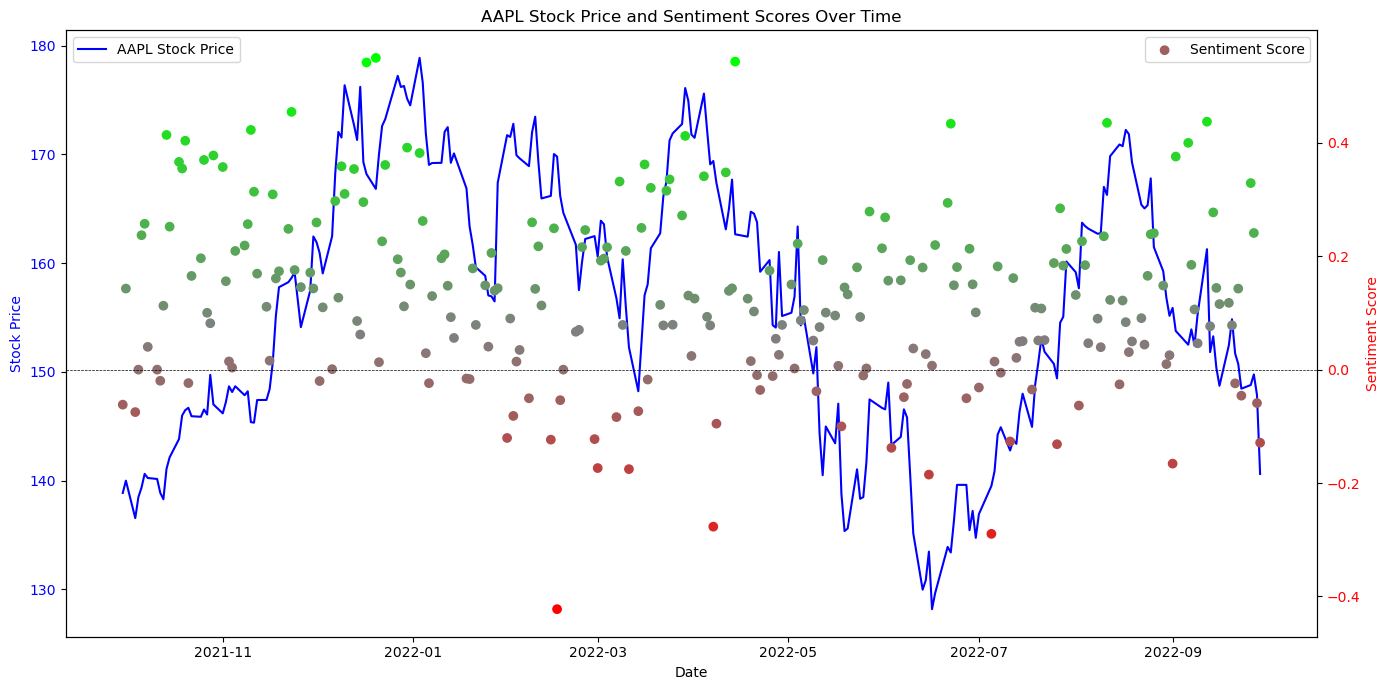

In [95]:
# %pip install seaborn
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

df_apple['Date'] = pd.to_datetime(df_apple['Date']).dt.normalize()
aapl_stock['Date'] = pd.to_datetime(aapl_stock['Date']).dt.normalize()

# Check date ranges of both dataframes
print("aapl_stock Date Range:", aapl_stock['Date'].min(), "to", aapl_stock['Date'].max())
print("df_apple Date Range:", df_apple['Date'].min(), "to", df_apple['Date'].max())

# Filter df_apple to only include dates within the aapl_stock date range
df_apple_filtered = df_apple[(df_apple['Date'] >= aapl_stock['Date'].min()) & (df_apple['Date'] <= aapl_stock['Date'].max())]

# Aggregate sentiment scores by taking the mean for each date
df_apple_agg = df_apple_filtered.groupby('Date').agg({'score': 'mean'}).reset_index()

# Merge the aggregated df_apple with aapl_stock on Date
df_merged = pd.merge(aapl_stock, df_apple_agg, on='Date', how='inner')

# Check number of rows in the merged dataframe
print("Number of rows in df_merged:", len(df_merged))

# Define a custom color map
colors = [(1, 0, 0), (0.5, 0.5, 0.5), (0, 1, 0)]  # R -> Gray -> G
n_bins = 100  # Discretize the color map into 100 bins
cmap_name = 'sentiment_cmap'
sentiment_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalize the sentiment scores to [0, 1] for color mapping
norm = plt.Normalize(df_merged['score'].min(), df_merged['score'].max())
sm = plt.cm.ScalarMappable(cmap=sentiment_cmap, norm=norm)
df_merged['color'] = df_merged['score'].apply(lambda x: sm.to_rgba(x))


# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot stock prices (e.g., Adj Close) on the primary y-axis
sns.lineplot(x='Date', y='Close', data=df_merged, ax=ax1, color='blue', label='AAPL Stock Price')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot sentiment scores on the secondary y-axis
ax2 = ax1.twinx()
ax2.scatter(df_merged['Date'], df_merged['score'], color=df_merged['color'], label='Sentiment Score')
ax2.axhline(y=0.0, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at sentiment score 0.0
ax2.set_ylabel('Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title('AAPL Stock Price and Sentiment Scores Over Time')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

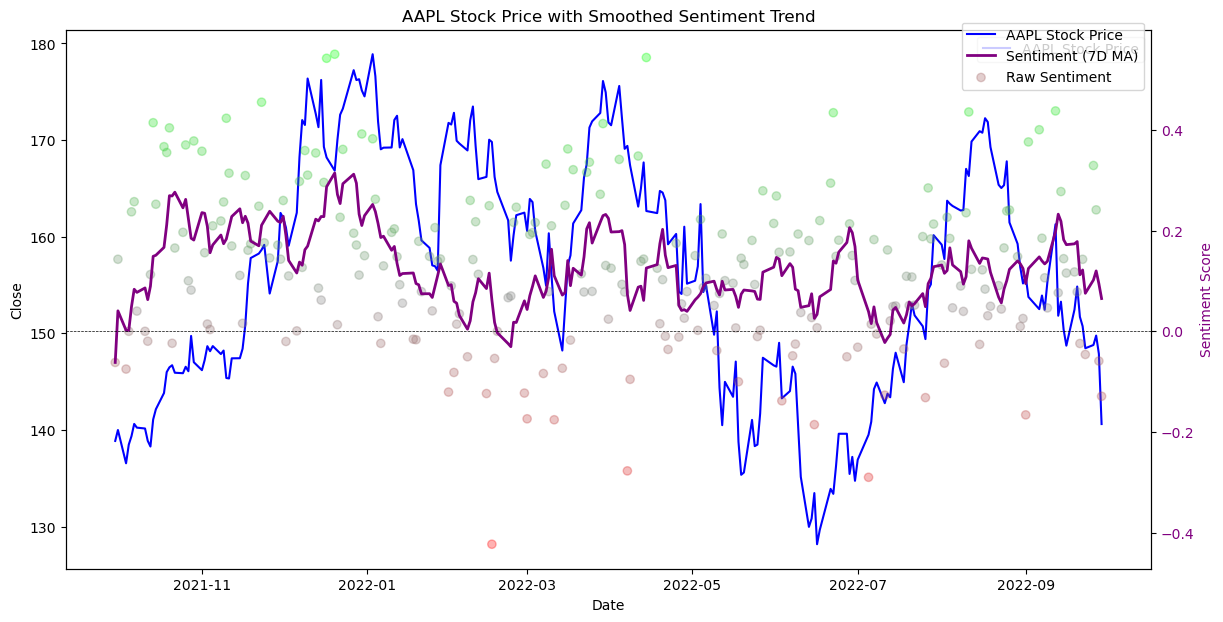

In [97]:
# 原始绘图代码（保留股票价格折线）
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(x='Date', y='Close', data=df_merged, ax=ax1, color='blue', label='AAPL Stock Price')

# 方法1：滚动平均（添加到副轴）
df_merged['score_ma7'] = df_merged['score'].rolling(7, min_periods=1).mean()
ax2 = ax1.twinx()
ax2.plot(df_merged['Date'], df_merged['score_ma7'], color='purple', linewidth=2, label='Sentiment (7D MA)')

# 可选：保留原始散点（透明度调低）
ax2.scatter(df_merged['Date'], df_merged['score'], color=df_merged['color'], alpha=0.3, label='Raw Sentiment')

# 格式设置
ax2.axhline(0, color='black', linestyle='--', linewidth=0.5)
ax2.set_ylabel('Sentiment Score', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
plt.title('AAPL Stock Price with Smoothed Sentiment Trend')
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.show()

In [ ]:
# NOTE: This code is only to process both Apple's and Tesla's stock.
# This code takes longer to do. I (Kian) will work with both stocks in the near future. For now, it's just Apple.

df_apple = df_tweets[df_tweets["Stock Name"] == "AAPL"]

# Filter for Tesla tweets and sample 5056 tweets
df_tesla = df_tweets[df_tweets["Stock Name"] == "TSLA"].sample(n=5056, random_state=1)

# Concatenate the Apple and sampled Tesla tweets
df_apple_tesla = pd.concat([df_apple, df_tesla]).reset_index(drop=True)

# Display the resulting DataFrame
print(df_apple_tesla)